# Loading the dataframe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

subjects: 22
sessions: 127
trials: 40138
  subj_idx  session  trial  reward  stimulus  difficulty        rt  correct  \
0     C1H1       23      1       1         1           2  2.135156        1   
1     C1H1       23      3       1         1           4       NaN        0   
2     C1H1       23      4       1         0           4       NaN        0   
3     C1H1       23      5       1         1           5  0.429073        1   
4     C1H1       23      6       1         1           0  1.101905        1   

   choice  hit  fa  miss  cr       cr2  miss2  
0       1    1   0     0   0  4.240000    0.0  
1       0    0   0     1   0  1.880000    3.0  
2       1    0   1     0   0  3.387153    0.0  
3       1    1   0     0   0  2.280000    0.0  
4       1    1   0     0   0  6.280000    0.0  
      subj_idx  session  trial  reward  stimulus  difficulty        rt  \
40133     W1T1       28    353       2         1           0  0.395351   
40134     W1T1       28    354       2         0

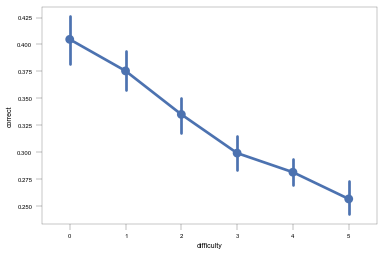

In [2]:
import sys, os, glob
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.set(style='ticks', font='Arial', font_scale=1, rc={
    'axes.linewidth': 0.25, 
    'axes.labelsize': 7, 
    'axes.titlesize': 7, 
    'xtick.labelsize': 6, 
    'ytick.labelsize': 6, 
    'legend.fontsize': 6, 
    'xtick.major.width': 0.25, 
    'ytick.major.width': 0.25,
    'text.color': 'Black',
    'axes.labelcolor':'Black',
    'xtick.color':'Black',
    'ytick.color':'Black',} )
sns.plotting_context()

# directories:
#project_dir = '/Users/jwdegee/Box Sync/undergrad_instructions/'
#fig_dir = os.path.join(project_dir, 'figs')

# load:
df = pd.read_csv('data.csv')

# subselect rows:
df = df.loc[df['trial']<421,:].reset_index(drop=True)

# subselect columns:
columns = ['subj_idx', 'session', 'trial', 'block_type', 'stimulus', 'difficulty_b2', 'rt', 'correct', 'choice', 'hit', 'fa', 'miss', 'cr', 'cr2', 'miss2']
df = df.loc[:,columns]

# rename some columns:
df = df.rename(columns={'block_type': 'reward',
                        'difficulty_b2': 'difficulty',})

# make integers:
columns = ['session', 'trial', 'reward', 'stimulus', 'difficulty', 'correct', 'choice', 'hit', 'fa', 'miss', 'cr']
df.loc[:,columns] = df.loc[:,columns].astype(int)

# set RT to NaN on all but hit trials:
df.loc[df['hit']!=1, 'rt'] = np.NaN

# print some info on subject and sessions:
subjects = [subj for subj, d in df.groupby('subj_idx')]
nr_sessions = [len(np.unique(d['session'])) for subj, d in df.groupby('subj_idx')]
print('subjects: {}'.format(len(subjects)))
print('sessions: {}'.format(sum(nr_sessions)))
print('trials: {}'.format(df.shape[0]))

# check out dataframe:
print(df.head())
print(df.tail())

# the old way of computing stuff:
correct = []
for s in np.unique(df['subj_idx']):
    temp = df.loc[df['subj_idx']==s, 'correct']
    correct.append(temp.mean())

# the new and better way:
res = df.groupby(['subj_idx']).mean()['correct'].reset_index()

# this becomes especially helpful when we want to do this separately for reward block and difficulty:
res = df.groupby(['subj_idx', 'difficulty']).mean()['correct'].reset_index()

# let's plot the result:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.pointplot(x='difficulty', y='correct', units='subj_idx', data=res, ax=ax)
#fig.savefig(os.path.join(fig_dir, 'performance.pdf'))

#FIXME plot the same for hit-rates, and compare to the overall fa-rate
# hit-rate: nr_hit / (nr_hit + nr_miss2)
# fa_rate: nr_fa / (nr_fa + nr_cr2)

#FIXME plot hit-rates both as a function of reward and difficulty



In [3]:
df.head()

,subj_idx,session,trial,reward,stimulus,difficulty,rt,correct,choice,hit,fa,miss,cr,cr2,miss2
0,C1H1,23,1,1,1,2,2.135156,1,1,1,0,0,0,4.240000,0.0
1,C1H1,23,3,1,1,4,NaN,0,0,0,0,1,0,1.880000,3.0
2,C1H1,23,4,1,0,4,NaN,0,1,0,1,0,0,3.387153,0.0
3,C1H1,23,5,1,1,5,0.429073,1,1,1,0,0,0,2.280000,0.0
4,C1H1,23,6,1,1,0,1.101905,1,1,1,0,0,0,6.280000,0.0


# The first graph

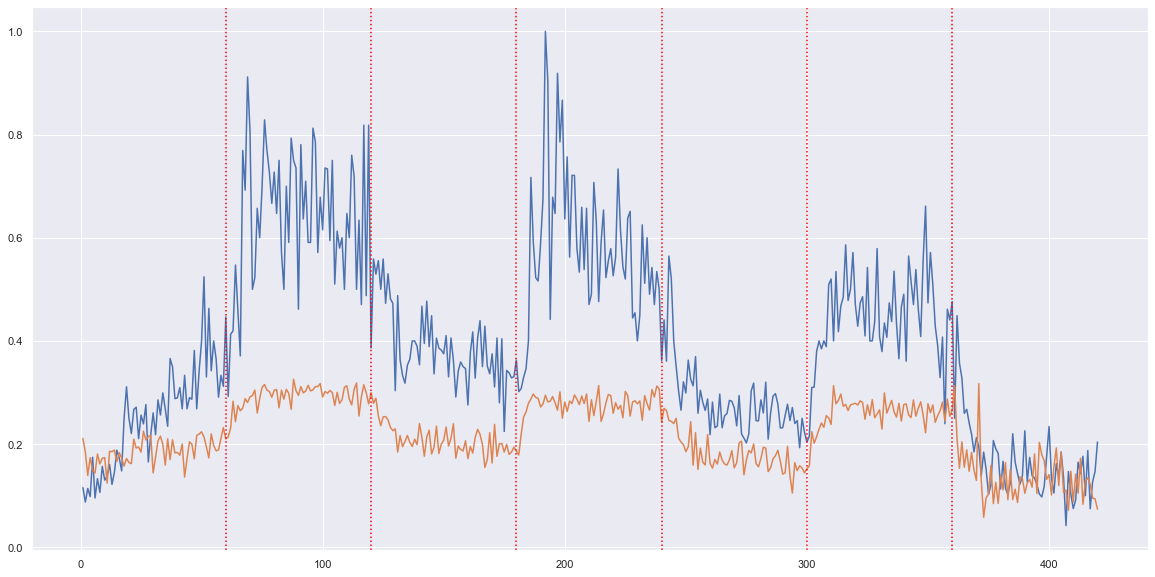

In [10]:
fig, ax = plt.subplots(figsize = (20, 10))

sns.set()



hue = ['blue', 'orange', 'blue', 'orange','blue', 'orange','blue']
ranges = [0, 60, 120, 180, 240, 300, 360, 420]
avghit = df.groupby(['trial', 'stimulus']).sum().loc[(range(421) ,1), 'hit'].values / (df.groupby(['trial', 'stimulus']).sum().loc[(range(421) ,1), 'hit'].values + df.groupby(['trial', 'stimulus']).sum().loc[(range(421) ,1), 'miss2'].values)



avgfa = df.groupby(['trial', 'stimulus']).sum().loc[(range(421) ,0), 'fa'].values / (df.groupby(['trial', 'stimulus']).sum().loc[(range(421) ,0), 'fa'].values + df.groupby(['trial', 'stimulus']).sum().loc[(range(421) ,0), 'cr2'].values)

# for i in range(len(ranges) -1):
#     ax.plot(range(ranges[i], ranges[i+1]), avghit[ranges[i]:ranges[i + 1]], color = hue[i])

sns.lineplot(x=range(1, 421),y=avghit, ax=ax)
sns.lineplot(x=range(1, 421),y=avgfa, ax=ax)


for n in range(1, 420):
    if n% 60 == 0:
        ax.axvline(n, color = 'red', linestyle = ':')

# ax.scatter(df['carat'], df['price'], c=df['color'].apply(lambda x: colors[x]))

# The second graph

In [22]:
hrbydiff = df.groupby(['stimulus', 'difficulty']).sum().loc[(1, range(6)), 'hit'] / (df.groupby(['stimulus', 'difficulty']).sum().loc[(1, range(6)), 'hit'] + df.groupby(['stimulus', 'difficulty']).sum().loc[(1, range(6)), 'miss2'])

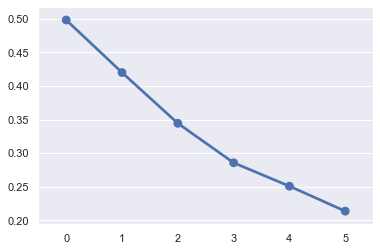

In [31]:
sns.pointplot(x = list(range(6)), y=np.asarray(hrbydiff))

In [25]:
np.asarray(hrbydiff)

array([0.4981203 , 0.41993007, 0.34436767, 0.28558719, 0.25074205,
       0.21356885])

In [69]:
hrbydiff = df.groupby(['stimulus', 'reward','difficulty']).sum().loc[(1, range(1, 3), range(6)), 'hit'] / (df.groupby(['stimulus', 'reward','difficulty']).sum().loc[(1, range(1, 3), range(6)), 'hit'] + df.groupby(['stimulus', 'reward','difficulty']).sum().loc[(1, range(1, 3), range(6)), 'miss2']) #hit rate by difficulty

In [70]:
hrbydiff = pd.DataFrame(hrbydiff)
hrbydiff = hrbydiff.rename(columns={ 0: 'hr'}).reset_index(level=['reward', 'difficulty']).loc[1]

Text(0.5, 1.0, 'hit rate by difficulty seperated by reward')

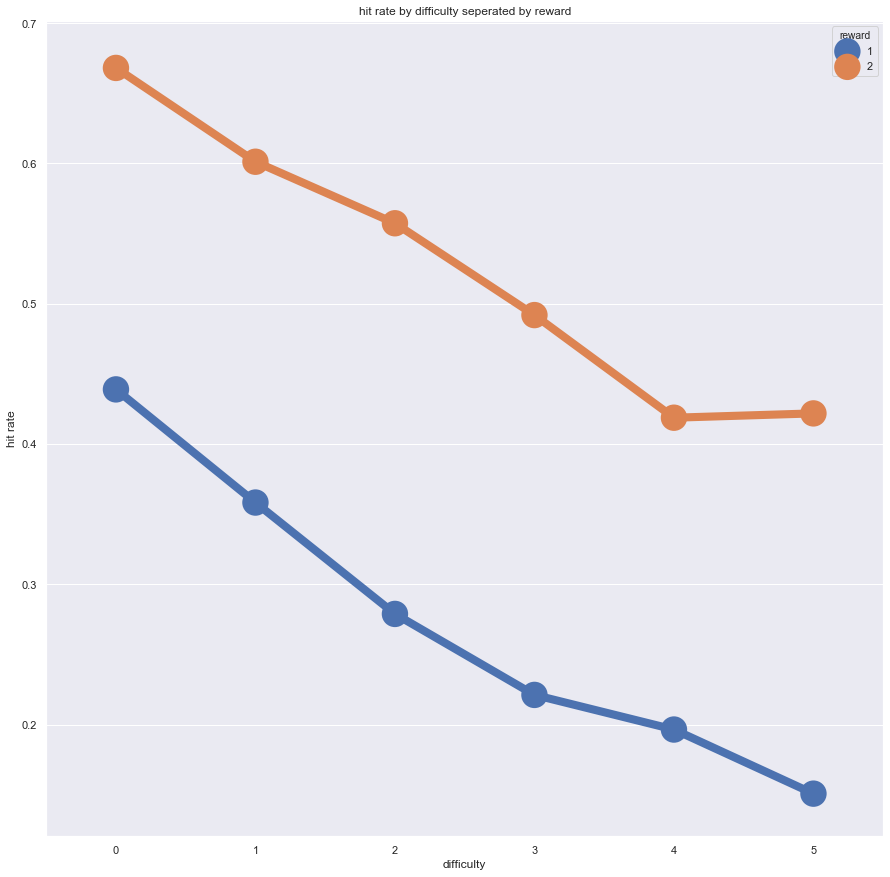

In [81]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.pointplot(x='difficulty', y='hr', hue = 'reward', data = hrbydiff, scale = 3)
plt.ylabel('hit rate')
plt.title('hit rate by difficulty seperated by reward')

# Graph 3

In [84]:
from scipy.stats import norm
norm.ppf(0.8)

0.8416212335729143

In [88]:
fabydiff = df.groupby(['stimulus', 'reward','difficulty']).sum().loc[(0, range(1, 3), range(6)), 'fa'] / (df.groupby(['stimulus', 'reward','difficulty']).sum().loc[(0, range(1, 3), range(6)), 'fa'] + df.groupby(['stimulus', 'reward','difficulty']).sum().loc[(0, range(1, 3), range(6)), 'cr2']) #hit rate by difficulty

In [83]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.pointplot(x='difficulty', y='hr', hue = 'reward', data = hrbydiff, scale = 3)
plt.ylabel('hit rate')
plt.title('hit rate by difficulty seperated by reward')

In [90]:
fabydiff = pd.DataFrame(fabydiff)
fabydiff = fabydiff.rename(columns={ 0: 'fa'}).reset_index(level=['reward', 'difficulty']).loc[0]

In [92]:
norm.ppf(fabydiff['fa'])

array([-0.90541776, -0.93564483, -0.9052114 , -0.90368017, -0.87071966,
       -0.8917939 , -0.59396794, -0.59317704, -0.58716411, -0.60474927,
       -0.58378238, -0.58970577])

In [112]:
dprime = norm.ppf(hrbydiff.reset_index(level= 'stimulus')['hr']) - norm.ppf(fabydiff.reset_index(level='stimulus')['fa'])

In [113]:
dprime

array([ 0.75172373,  0.57249752,  0.31892071,  0.13518895,  0.01619988,
       -0.14165531,  1.02870202,  0.84973418,  0.7314865 ,  0.58445761,
        0.37866231,  0.39244538])

In [95]:
norm.ppf(0.8)

0.8416212335729143

In [110]:
hrbydiff.reset_index(level= 'stimulus')['hr']

0     0.438925
1     0.358247
2     0.278840
3     0.221098
4     0.196409
5     0.150697
6     0.668122
7     0.601240
8     0.557377
9     0.491905
10    0.418739
11    0.421812
Name: hr, dtype: float64

In [111]:
fabydiff.reset_index(level='stimulus')['fa'].sum()

0     0.182622
1     0.174728
2     0.182677
3     0.183083
4     0.191954
5     0.186252
6     0.276267
7     0.276531
8     0.278547
9     0.272673
10    0.279683
11    0.277694
Name: fa, dtype: float64

In [146]:
fa = df.groupby(['stimulus', 'reward']).sum().loc[(0, [1, 2]), 'fa'] / (df.groupby(['stimulus', 'reward']).sum().loc[(0, [1, 2]), 'fa'] + df.groupby(['stimulus', 'reward']).sum().loc[(0, [1, 2]), 'cr2'])
fa = fa.reset_index(['stimulus'])
fa = fa.rename(columns = {0:'fa'})
del fa['stimulus']
fa

,fa
reward,
1,0.183399
2,0.276874


In [170]:
final = hrbydiff.reset_index('stimulus')
del final['stimulus']
final = final.set_index(['reward'])

In [171]:
final['fa'] = np.zeros(12)

In [172]:
final.loc[1, 'fa'] = fa.loc[1, 'fa']

In [174]:
final.loc[2, 'fa'] = fa.loc[2, 'fa']

In [177]:
final = final.reset_index(['reward'])
final['dprime'] = norm.ppf(final['hr']) - norm.ppf(final['fa']) 

In [178]:
final

,reward,difficulty,hr,fa,dprime
0,1,0,0.438925,0.183399,0.748792
1,1,1,0.358247,0.183399,0.539338
2,1,2,0.278840,0.183399,0.316195
3,1,3,0.221098,0.183399,0.133994
4,1,4,0.196409,0.183399,0.047966
5,1,5,0.150697,0.183399,-0.130964
6,2,0,0.668122,0.276874,1.026886
7,2,1,0.601240,0.276874,0.848709
8,2,2,0.557377,0.276874,0.736475
9,2,3,0.491905,0.276874,0.571861


Text(0.5, 1.0, 'sensitivity by difficulty seperated by reward')

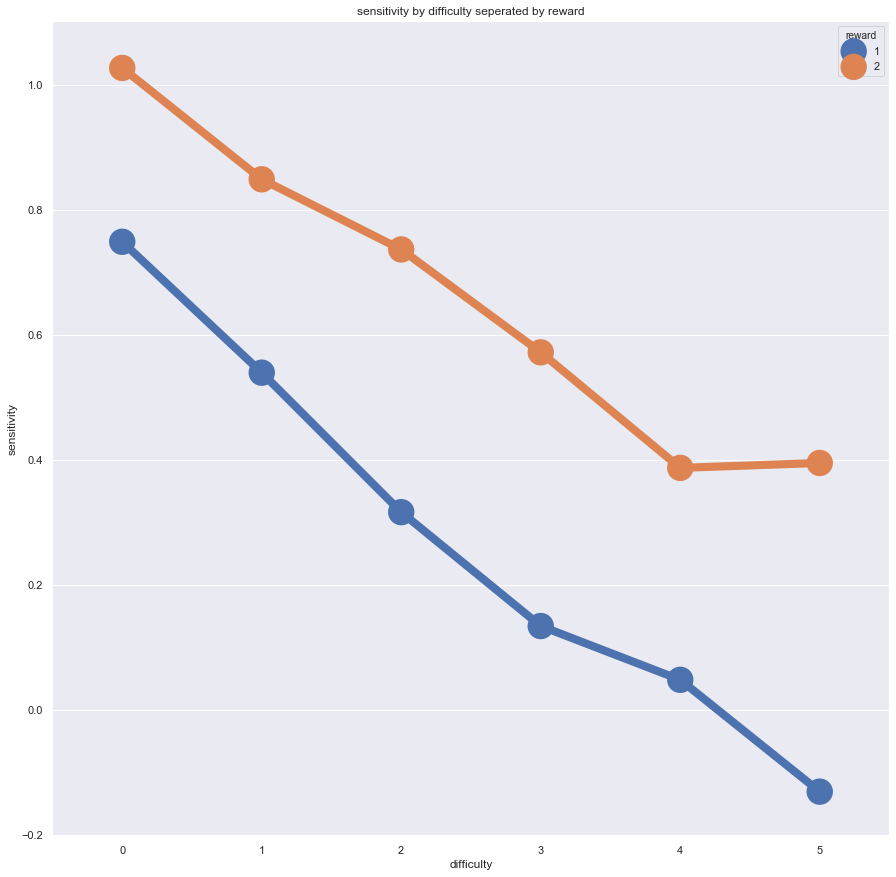

In [179]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.pointplot(x='difficulty', y='dprime', hue = 'reward', data = final, scale = 3)
plt.ylabel('sensitivity')
plt.title('sensitivity by difficulty seperated by reward')

# Graph 4

In [182]:
fa_sum = df.groupby('stimulus').get_group(0).sum()['fa']
cr2_sum = df.groupby('stimulus').get_group(0).sum()['cr2']

fa_rate = fa_sum / (fa_sum + cr2_sum)

0.22754165050343972

In [204]:
hr_sum = df.groupby(['stimulus', 'difficulty']).sum().loc[(1, range(6)), 'hit']
miss_sum = df.groupby(['stimulus', 'difficulty']).sum().loc[(1, range(6)), 'miss2']

hit_rate = pd.DataFrame(hr_sum / (hr_sum + miss_sum))
hit_rate = hit_rate.reset_index(['stimulus', 'difficulty'])
del hit_rate['stimulus']
hit_rate = hit_rate.rename(columns = {0 :'hit rate'})

In [214]:
diff = hit_rate
diff['fa'] = fa_rate
diff['dprime'] = norm.ppf(diff['hit rate']) - norm.ppf(diff['fa'])

In [218]:
diff['criterion'] = -(norm.ppf(diff['hit rate']) + norm.ppf(diff['fa']))/2

In [219]:
diff

,difficulty,hit rate,fa,dprime,criterion
0,0,0.498120,0.227542,0.742256,0.375840
1,1,0.419930,0.227542,0.544895,0.474520
2,2,0.344368,0.227542,0.346395,0.573770
3,3,0.285587,0.227542,0.180645,0.656645
4,4,0.250742,0.227542,0.074811,0.709562
5,5,0.213569,0.227542,-0.047132,0.770533


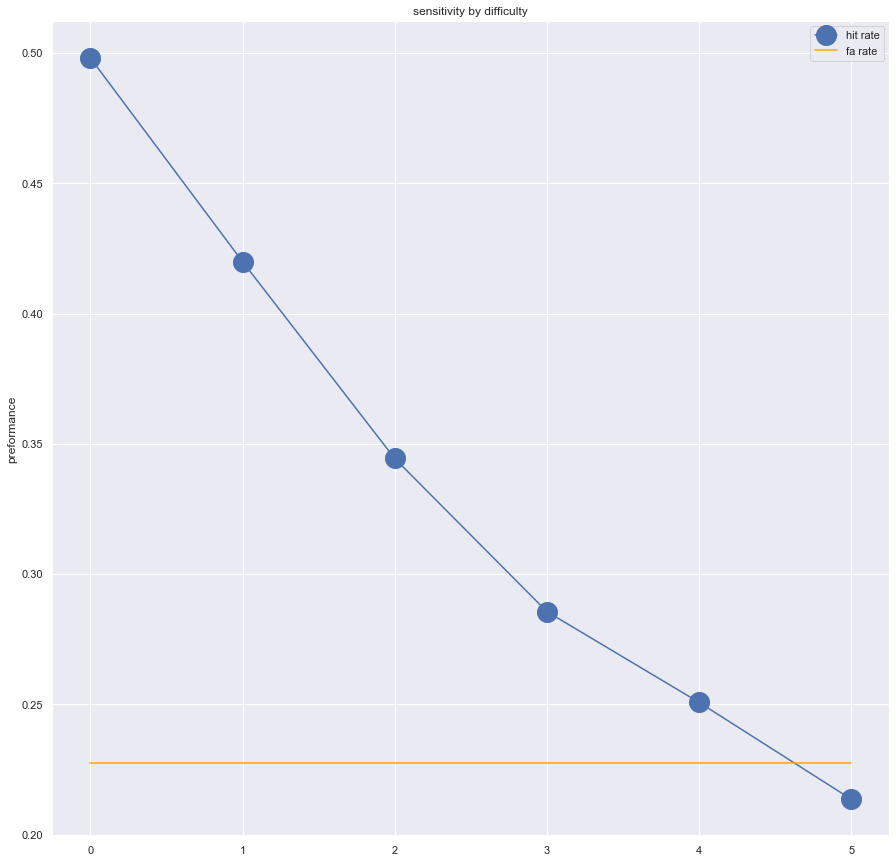

In [236]:
fig, ax = plt.subplots(figsize = (15, 15))
plt.plot(diff['difficulty'], diff['hit rate'], marker ='o', markersize = 20, label = 'hit rate')
plt.plot(diff['difficulty'], diff['fa'], color = 'orange',  label = 'fa rate')
plt.ylabel('preformance')
plt.title('sensitivity by difficulty')
plt.legend()

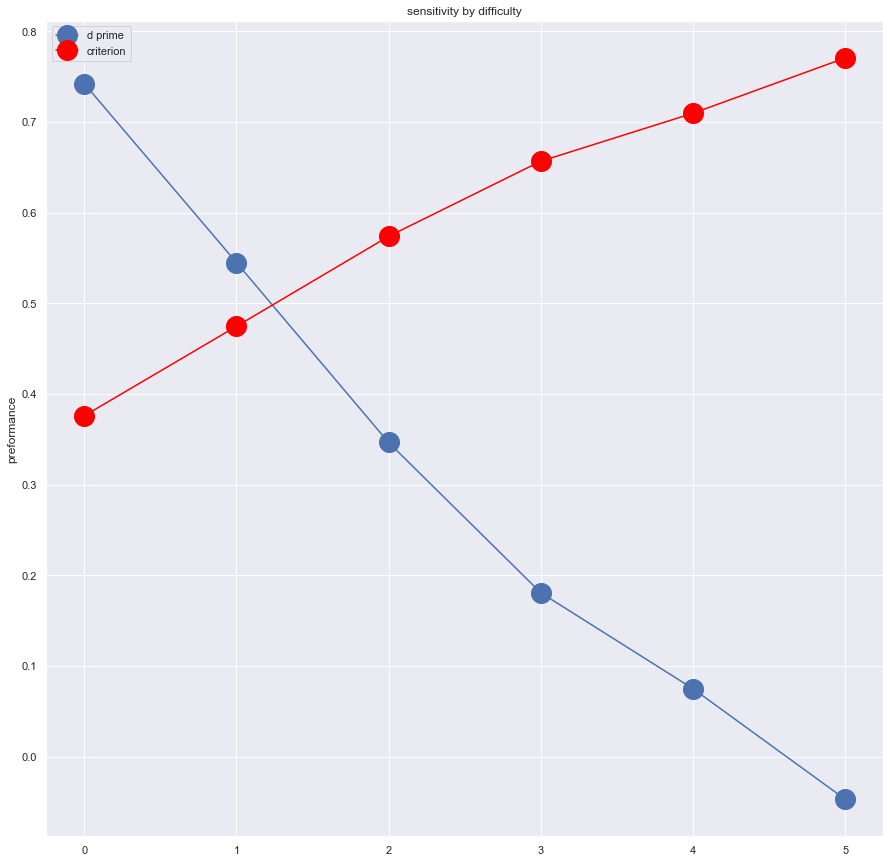

In [240]:
fig, ax = plt.subplots(figsize = (15, 15))
plt.plot(diff['difficulty'], diff['dprime'], marker ='o', markersize = 20, label = 'd prime')
plt.plot(diff['difficulty'], diff['criterion'], color = 'red',marker= 'o', markersize=20, label = 'criterion')
plt.ylabel('preformance')
plt.title('sensitivity by difficulty')
plt.legend()

# Graph 5

ValueError: could not broadcast input array from shape (420) into shape (3)

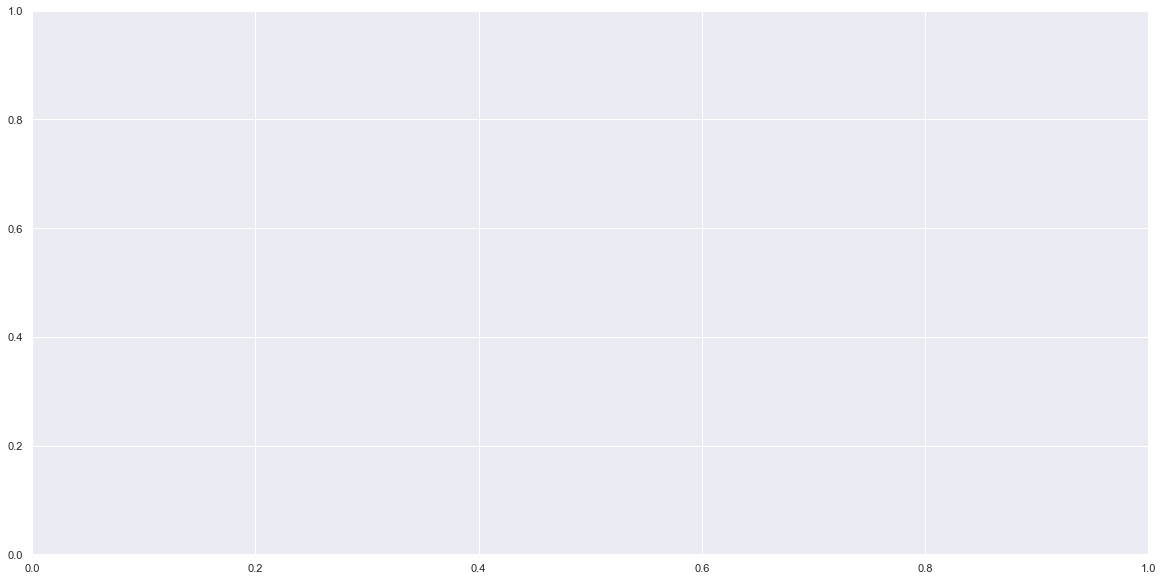

In [247]:
fig, ax = plt.subplots(figsize = (20, 10))

sns.set()

hit_sum = df.groupby(['stimulus', 'trial', 'difficulty']).sum().loc[(1, range(1, 421), range(6)), 'hit']
cr2_sum = df.groupby(['stimulus', 'trial', 'difficulty']).sum().loc[(1, range(1, 421), range(6)), 'cr2']



avgfa = df.groupby(['trial', 'stimulus']).sum().loc[(range(421) ,0), 'fa'].values / (df.groupby(['trial', 'stimulus']).sum().loc[(range(421) ,0), 'fa'].values + df.groupby(['trial', 'stimulus']).sum().loc[(range(421) ,0), 'cr2'].values)

# for i in range(len(ranges) -1):
#     ax.plot(range(ranges[i], ranges[i+1]), avghit[ranges[i]:ranges[i + 1]], color = hue[i])

sns.lineplot(x='trial',y='', data = avghit , ax=ax)
sns.lineplot(x=range(1, 421),y=avgfa, ax=ax)


for n in range(1, 420):
    if n% 60 == 0:
        ax.axvline(n, color = 'red', linestyle = ':')

# ax.scatter(df['carat'], df['price'], c=df['color'].apply(lambda x: colors[x]))

(120, 440.95)

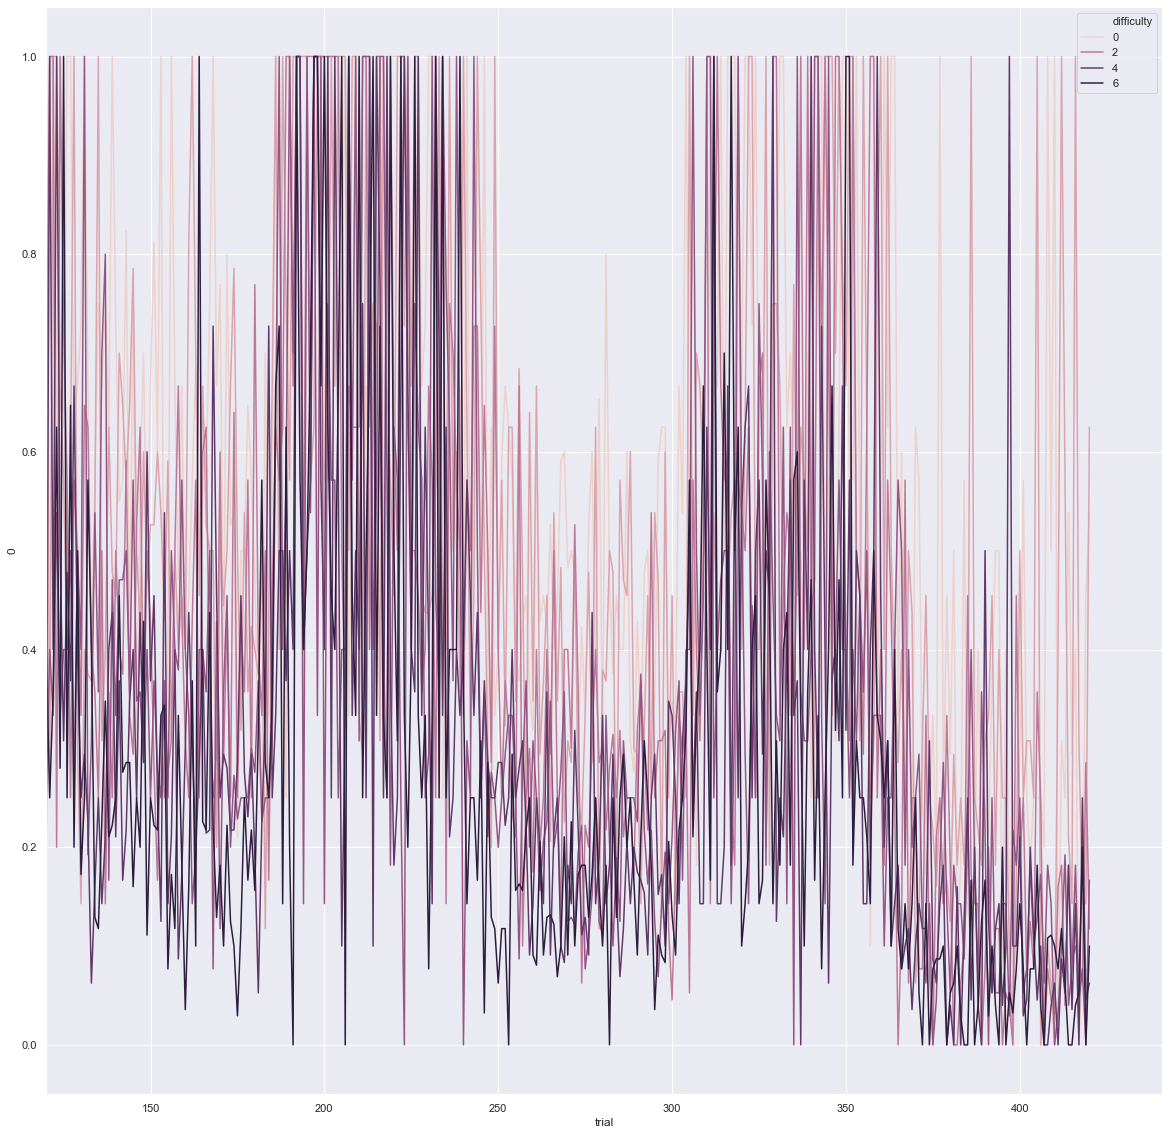

In [259]:
fig, ax = plt.subplots(figsize = (20, 20))
hit_sum = df.groupby(['stimulus', 'trial', 'difficulty']).sum().loc[(1, range(1, 421), range(6)), 'hit']
miss_sum = df.groupby(['stimulus', 'trial', 'difficulty']).sum().loc[(1, range(1, 421), range(6)), 'miss2']
hr = pd.DataFrame(hit_sum / (hit_sum + miss_sum)).reset_index(['stimulus', 'trial', 'difficulty'])
sns.lineplot(x = 'trial', y = 0, hue="difficulty", data=hr)


# Graph 6

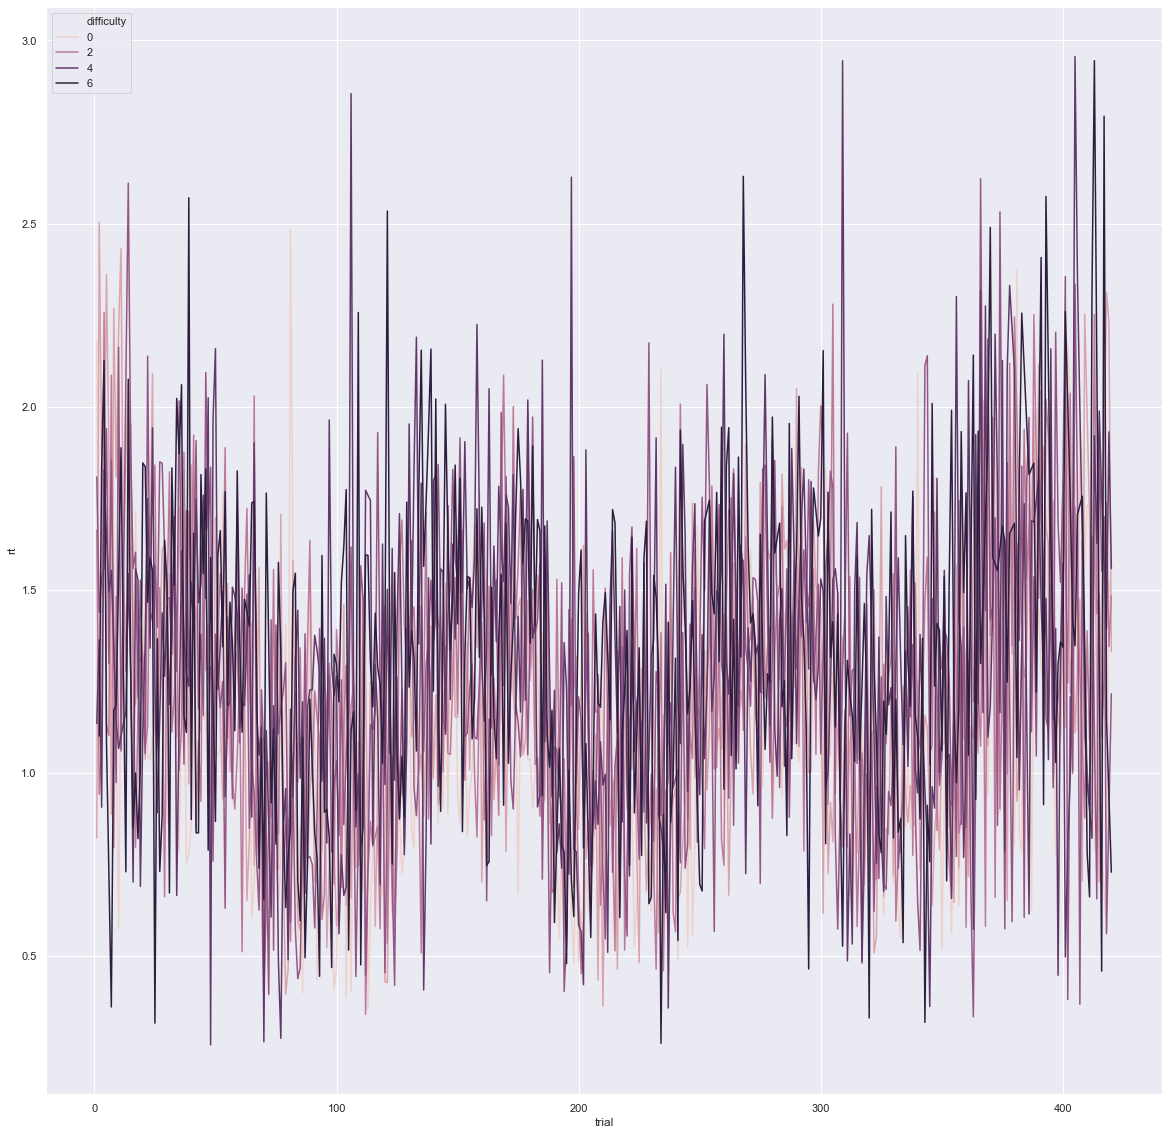

In [281]:
fig, ax = plt.subplots(figsize =(20, 20))

rt = pd.DataFrame(df.groupby(['stimulus', 'trial', 'difficulty']).mean().loc[(1, range(1, 421), range(6)), 'rt'])
rt = rt.reset_index(['difficulty', 'trial'])
sns.lineplot(x = 'trial', y='rt', hue = 'difficulty', data=rt)

In [277]:
rt

rt
stimulus trial difficulty          
1        1     0           2.180371
               1           0.821758
               2           1.662409
               3           1.808080
               4           1.134436
               5                NaN
         2     0           1.064719
               1           2.503669
               2           0.941067
               3           1.438362
               4           1.363235
               5           1.100242
         3     0           1.662706
               1           1.869028
               2           1.079349
               3           1.534144
               4           0.905835
               5           1.833907
         4     0           1.630812
               1           1.729225
               2           2.256936
               3           1.559515
               4           1.827238
               5           2.126083
         5     0           1.391850
               1           2.360861
               2           1.131273
               3           1.939568
               4           1.647482
               5           1.084601
...                             ...
         416   0           0.788013
               1           1.461033
               2           1.097556
               3           1.550739
               4           1.761857
               5           0.458300
         417   0                NaN
               1           1.917362
               2           1.255684
               3           1.699260
               4                NaN
               5           2.792967
         418   0           0.570667
               1           2.310335
               2           1.737121
               3           0.560580
               4           1.393397
               5           1.144689
         419   0           1.526950
               1           2.233882
               2           1.344560
               3                NaN
               4           1.930902
               5                NaN
         420   0           1.382802
               1           1.330770
               2           1.482949
               3           1.215928
               4           1.557693
               5           0.728388

[2519 rows x 1 columns]